##Решение задачи 10. Интерполяция
######Необходимо:
1) определить коэффициенты квадратичной формы $z = ax^2 + bxy + cy^2 + dx+ey+f$ при $z=0$ методом наименьших квадратов, положив $a=1$;
######2) изобразить орбиту планеты и построить заданные точки на том же графике;
######3) несколько изменить векторы x, y, добавляя к каждой компоненте случайную величину, равномерно распределенную на отрезке $[-.005, .005]$;
######4) вычислить новые коэффициенты и изобразить новую орбиту на прежнем графике; 
######5) объяснить различие коэффициентов и орбит от прежних.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

1) Исходную систему 
$$
\left\{
\begin{array}{l}
x_0^2 + b x_0 y_0 + c y_0^2 + d x_0 + e y_0 + f = 0, \\
x_1^2 + b x_1 y_1 + c y_1^2 + d x_1 + e y_1 + f = 0, \\
\dots \\
x_9^2 + b x_9 y_9 + c y_9^2 + d x_9 + e y_9 + f = 0, \\
\end{array}
\right.
$$
преобразуем следующим образом: 
$$
\left\{
\begin{array}{l}
b x_0 y_0 + c y_0^2 + d x_0 + e y_0 + f = -x_0^2, \\
b x_1 y_1 + c y_1^2 + d x_1 + e y_1 + f = -x_1^2, \\
\dots \\
b x_9 y_9 + c y_9^2 + d x_9 + e y_9 + f = -x_9^2. \\
\end{array}
\right.
$$ 
##### Введём матричное обозначение: 
### $$ A = 
\left(
\begin{array}{ccccc}
    x_0*y_0 & y_0^2 & x_0 & y_0 & 0 \\
    x_1*y_1 & y_1^2 & x_1 & y_1 & 0 \\
\dots \\
    x_9*y_9 & y_9^2 & x_9 & y_9 & 0 \\
\end{array}
\right),
\qquad
x =
\left(
\begin{array}{c}
b \\
c \\
d \\
e \\
f \\
\end{array}
\right),
\qquad
B =
\left(
\begin{array}{c}
-x_0^2 \\
-x_1^2 \\
\vdots \\
-x_9^2 \\
\end{array}
\right).
$$
Тогда решение задачи сводится к решению уравнения $A*x=B$. Линейную задачу наименьших квадратов решает функция linalg.lstsq(A, B). 
#####Исходные данные, вектора $x$ и $y$:

In [32]:

x = np.array([1.02, .95, .87, .77, .67, .56, .44, .30, .16, .01])
y = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15])

Генерируем матрицу констант $A$:

In [33]:
A = np.vstack([x*y, y**2, x, y, np.ones(x.shape)]).T

Решаем систему:

In [34]:
(b,c,d,e,f), res, rank, s = np.linalg.lstsq(A, -x**2, rcond=None)
b,c,d,e,f

(-0.14364618259888937,
 2.6356254837120843,
 -0.5514469631403583,
 -3.2229403381058916,
 0.4328942702644504)

*lstsq()* возвращает коэффициенты $(b, c, d, e, f)$, сумму квадратов *residuals*, ранг *rank* матрицы X и ее сингулярные числа *sv*.
#####Задаём размеры поля для отрисовки в формате (x0, x1, y0, y1) и матрицы координат в этом поле:

In [35]:
ext = (x.min(), x.max(), y.min(), y.max())
xm,ym = np.meshgrid(np.linspace(ext[0], ext[1], 1024),
                   np.linspace(ext[2], ext[3], 1024))

Считаем квадратичную форму:

In [36]:
a=1
z = a*xm**2 + b*xm*ym + c*ym**2 + d*xm + e*ym + f

2) Изобразим орбиту планеты и построим заданные точки на одном графике:

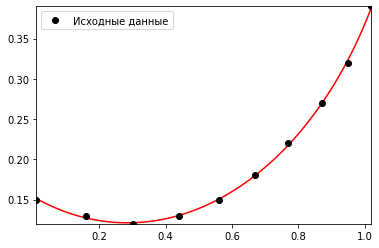

In [37]:
plt.figure()
plt.contour(z, levels=0, extent=ext, colors='r')
plt.plot(x, y, 'ko', label = 'Исходные данные')
plt.legend()
plt.show()

Зададим поле побольше:

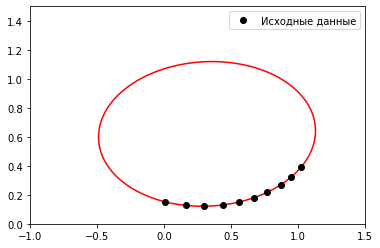

In [38]:
ext = (-1,1.5,0,1.5)
xm,ym = np.meshgrid(np.linspace(ext[0], ext[1], 1024),
                   np.linspace(ext[2], ext[3], 1024))
a=1
z = a*xm**2 + b*xm*ym + c*ym**2 + d*xm + e*ym + f
plt.figure()
plt.contour(z, levels=0, extent=ext, colors='r')
plt.plot(x, y, 'ko', label = 'Исходные данные')
plt.legend()
plt.show()

3) Несколько изменим векторы x, y, добавляя к каждой компоненте случайную величину, равномерно распределенную на отрезке  [−.005,.005]:

In [39]:
x = x + (np.random.rand(10)-0.5)*1e-2
y = y + (np.random.rand(10)-0.5)*1e-2

4) Вычислим новые коэффициенты и изобразим новую орбиту на прежнем графике:

In [40]:
A = np.vstack([x*y, y**2, x, y, np.ones(x.shape)]).T

a=1
(b,c,d,e,f), res, rank, s = np.linalg.lstsq(A, -x**2, rcond=None)

z1 = a*xm**2 + b*xm*ym + c*ym**2 + d*xm + e*ym + f
b,c,d,e,f

(-0.2615110448518436,
 2.5288578580161474,
 -0.53596781330058,
 -3.021749498901759,
 0.40192252616348867)

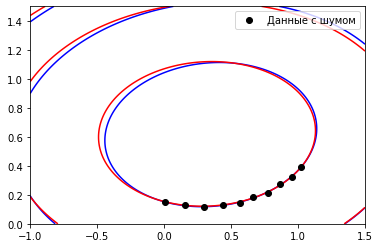

In [41]:
(-0.14364618259888937,
 2.6356254837120843,
 -0.5514469631403583,
 -3.2229403381058916,
 0.4328942702644504)
plt.contour(z1, levels=2, extent=ext, colors = 'b')
plt.contour(z, levels=2, extent=ext, colors = 'r')
plt.plot(x,y,'ko', label='Данные с шумом')
plt.legend()
plt.show()

5) Различие коэффициентов и орбит можно объяснить внесением изменений в данные вектора $x$ и $y$. Можно заметить, что изменения даже на таком малом отрезке как $[-.005, .005]$ существенны и видны невооружённым взглядом.